In [ ]:
!pip install ultralytics
!pip install -U ipywidgets

In [ ]:
import os
import random
from sklearn.metrics import confusion_matrix
from ultralytics import YOLO
import cv2
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
train_images = "trafic_data/train/images"
train_labels = "trafic_data/train/labels"

In [ ]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    return labels

In [ ]:
def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

In [ ]:
image_files = os.listdir(train_images)
random_images = random.sample(image_files, 16)

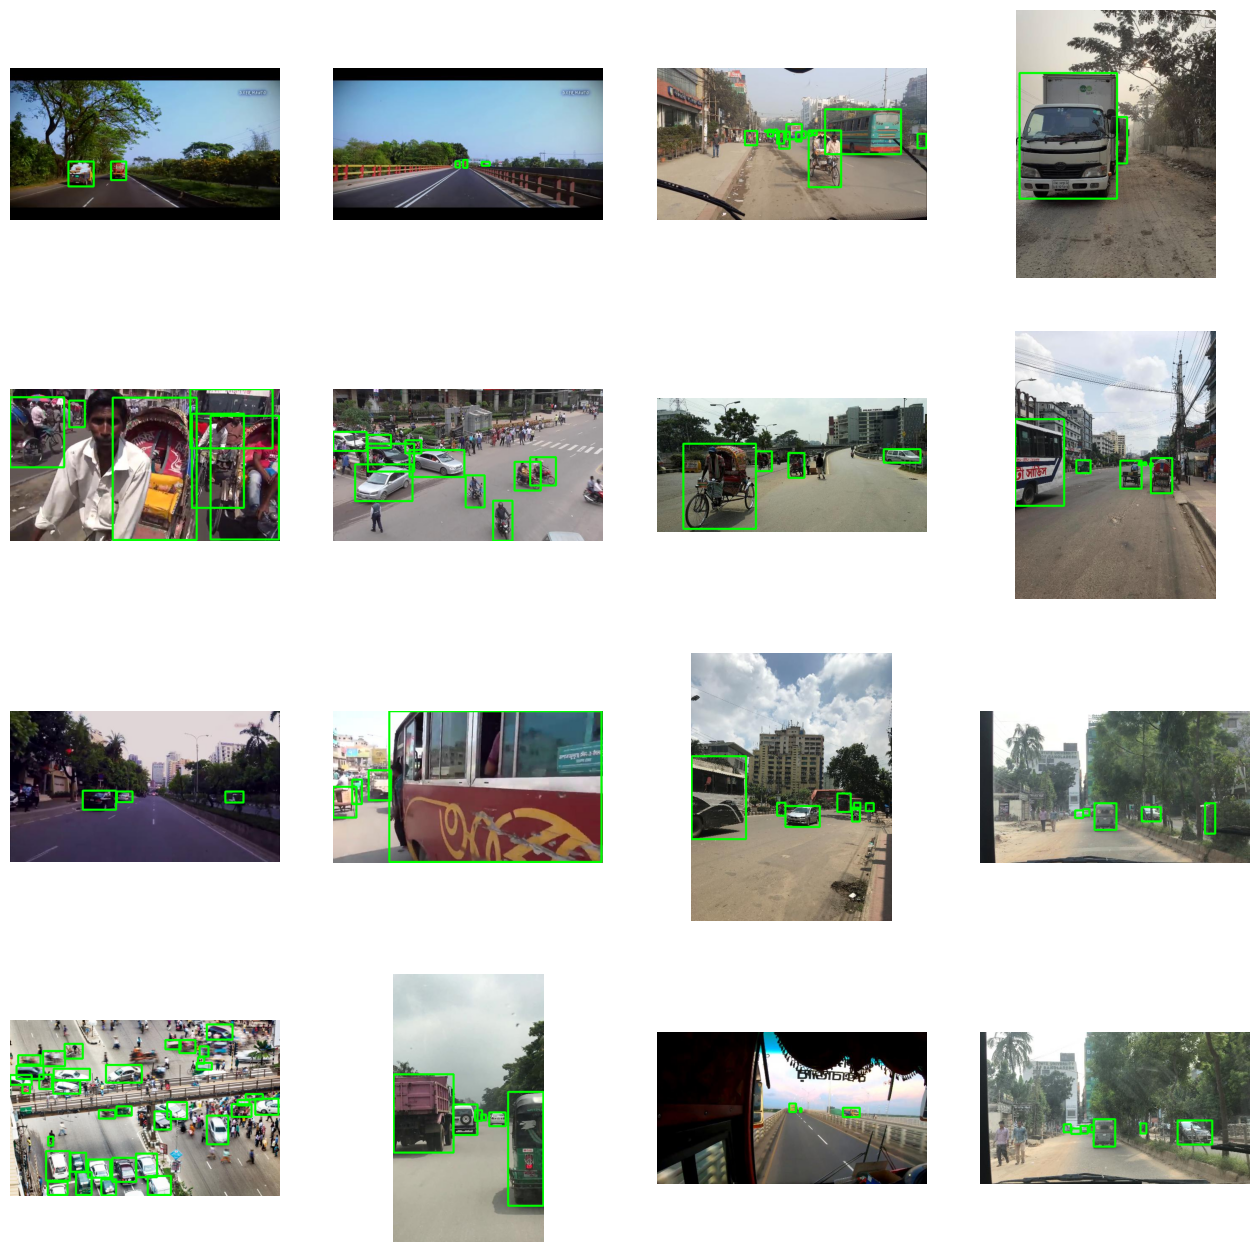

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    labels = load_labels(image_file, train_labels)
    plot_object_detections(axs[row, col], image, labels)
plt.show()


image 1/1 C:\Users\DESTOP\trafic_data\train\images\Pias--483-_jpg.rf.872ba822b16fbdfe8f6e1714fe111417.jpg: 256x416 2 trucks, 1056.6ms
Speed: 1.0ms preprocess, 1056.6ms inference, 3266.7ms postprocess per image at shape (1, 3, 256, 416)


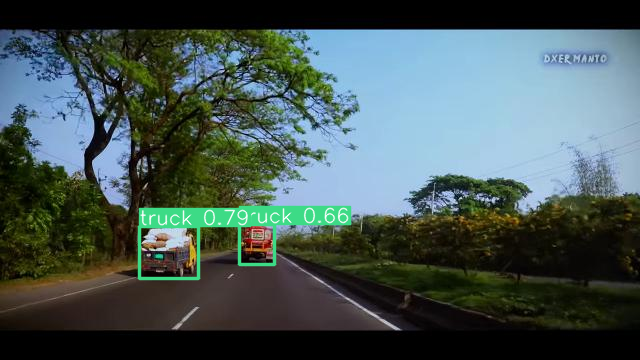

In [ ]:
model = YOLO("yolov8x.pt")

result_predict = model.predict(source = os.path.join(train_images, random_images[0]), imgsz=(416))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


0: 256x416 2 trucks, 1014.9ms
Speed: 2.0ms preprocess, 1014.9ms inference, 3.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 (no detections), 993.6ms
Speed: 5.0ms preprocess, 993.6ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 5 persons, 3 bicycles, 2 buss, 2 potted plants, 995.4ms
Speed: 2.9ms preprocess, 995.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 416x320 2 trucks, 1278.5ms
Speed: 2.0ms preprocess, 1278.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 320)

0: 256x416 11 persons, 2 bicycles, 1 bus, 3 umbrellas, 988.6ms
Speed: 4.5ms preprocess, 988.6ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 9 persons, 4 cars, 5 motorcycles, 1 truck, 984.3ms
Speed: 2.5ms preprocess, 984.3ms inference, 3.0ms postprocess per image at shape (1, 3, 256, 416)

0: 224x416 10 persons, 4 bicycles, 1 car, 941.5ms
Speed: 2.0ms preprocess, 941.5ms inference, 2.0ms postprocess per

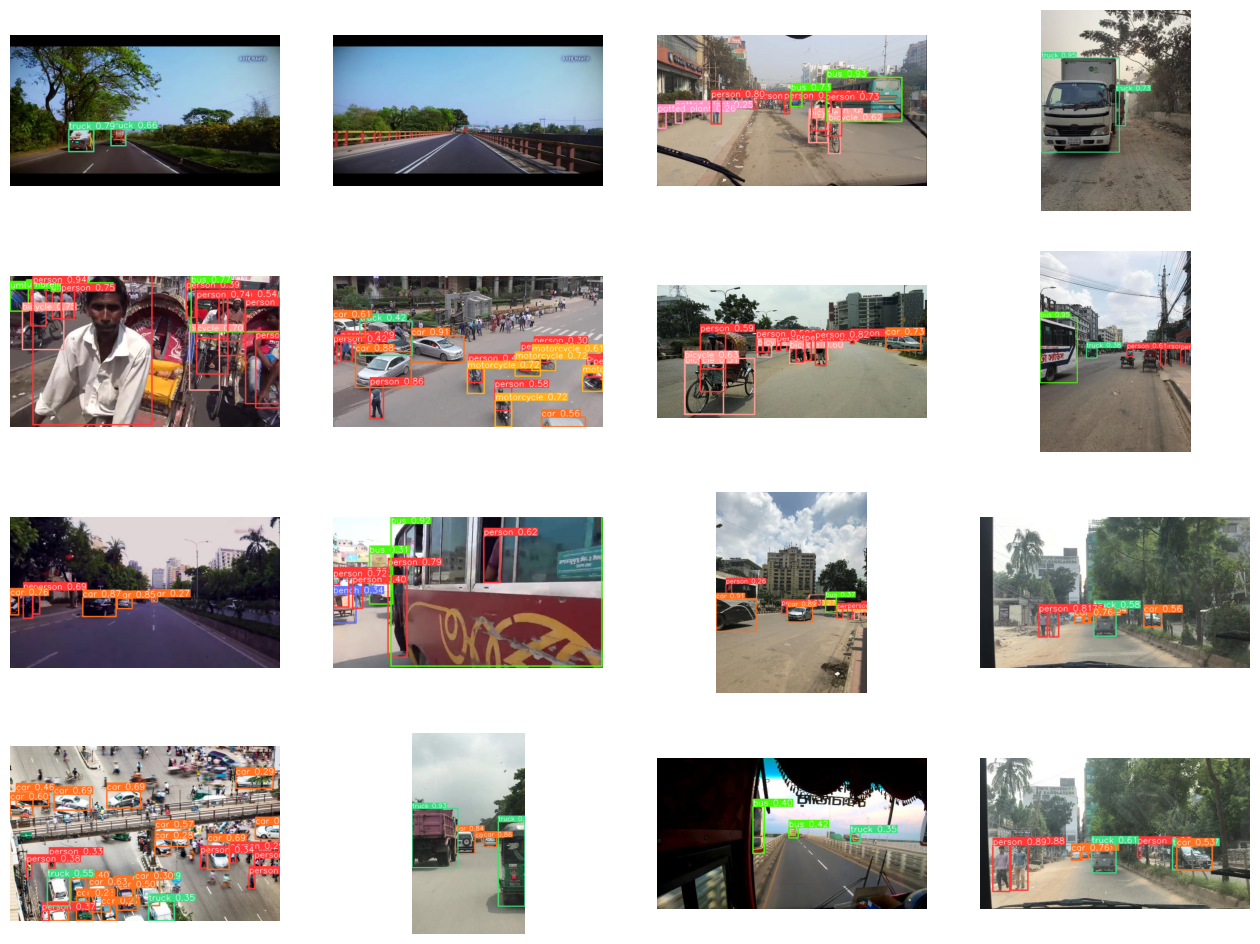

In [ ]:
fig, axs = plt.subplots(4, 4, figsize = (16, 12))
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    result_predict = model.predict(image, imgsz=(416))
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    axs[row,col].imshow(plot)
    axs[row,col].axis('off')
plt.show()

In [ ]:
model = YOLO('yolov8x.pt')
model.train(source =(train_images), epochs = 30, imgsz =416, seed = 42, batch = 8, workers = 4)

Ultralytics YOLOv8.1.45  Python-3.11.7 torch-2.2.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=coco8.yaml, epochs=30, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=trafic_data/train/images, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

train: Scanning C:\Users\DESTOP\datasets\coco8\labels\train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
val: Scanning C:\Users\DESTOP\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\train7
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.022      2.742      1.331         50        416: 100%|██████████| 1/1 [00:18<00:00, 18.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.30s/it]

                   all          4         17      0.876      0.905      0.945      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G     0.5918      1.283     0.9805         33        416: 100%|██████████| 1/1 [00:14<00:00, 14.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.07s/it]

                   all          4         17      0.876      0.902      0.945      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G       0.91      1.983      1.329         17        416: 100%|██████████| 1/1 [00:14<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.20s/it]

                   all          4         17      0.876      0.902      0.945      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G       1.18       3.27      1.639         25        416: 100%|██████████| 1/1 [00:13<00:00, 13.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.01s/it]

                   all          4         17      0.874      0.902      0.947       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G     0.6735      1.688      1.086         32        416: 100%|██████████| 1/1 [00:13<00:00, 13.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.63s/it]

                   all          4         17      0.835      0.897      0.948       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.215      2.717      1.571         36        416: 100%|██████████| 1/1 [00:14<00:00, 14.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.37s/it]

                   all          4         17      0.836      0.895      0.948       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G     0.7999     0.7084      1.223         30        416: 100%|██████████| 1/1 [00:13<00:00, 13.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.96s/it]

                   all          4         17      0.925      0.784       0.92      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G       0.79      2.327      1.314         13        416: 100%|██████████| 1/1 [00:13<00:00, 13.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.31s/it]

                   all          4         17      0.919      0.787      0.924      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.226      1.582      1.431         38        416: 100%|██████████| 1/1 [00:13<00:00, 13.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.85s/it]

                   all          4         17      0.919      0.787      0.924      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G       0.72      1.136      1.208         21        416: 100%|██████████| 1/1 [00:14<00:00, 14.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.37s/it]

                   all          4         17      0.916      0.789      0.924      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.7468     0.9686      1.174         37        416: 100%|██████████| 1/1 [00:12<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.19s/it]

                   all          4         17      0.916      0.789      0.924      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.7916      1.035      1.405         17        416: 100%|██████████| 1/1 [00:13<00:00, 13.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]

                   all          4         17      0.911      0.791      0.924      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      0.755     0.6548      1.274         22        416: 100%|██████████| 1/1 [00:13<00:00, 13.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.35s/it]

                   all          4         17      0.911      0.791      0.924      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.8933     0.6247      1.346         31        416: 100%|██████████| 1/1 [00:13<00:00, 13.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.98s/it]

                   all          4         17      0.905      0.793      0.925      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.6693     0.4863     0.9891         31        416: 100%|██████████| 1/1 [00:13<00:00, 13.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.57s/it]

                   all          4         17      0.905      0.793      0.925      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.5957     0.6041      1.054         27        416: 100%|██████████| 1/1 [00:14<00:00, 14.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.24s/it]

                   all          4         17      0.839      0.899      0.952       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.7186     0.8366      1.141         26        416: 100%|██████████| 1/1 [00:12<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.32s/it]

                   all          4         17      0.839      0.899      0.952       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.5863     0.5999      1.108         30        416: 100%|██████████| 1/1 [00:14<00:00, 14.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.36s/it]

                   all          4         17      0.843      0.899      0.952      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.003     0.5579      1.302         25        416: 100%|██████████| 1/1 [00:13<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.33s/it]

                   all          4         17      0.843      0.899      0.952      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.8286     0.7284      1.155         35        416: 100%|██████████| 1/1 [00:13<00:00, 13.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.36s/it]

                   all          4         17      0.842        0.9      0.952      0.794


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.5289      0.346     0.8835         13        416: 100%|██████████| 1/1 [00:13<00:00, 13.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.91s/it]

                   all          4         17      0.842        0.9      0.952      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.5665     0.3514     0.9276         13        416: 100%|██████████| 1/1 [00:13<00:00, 13.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.64s/it]

                   all          4         17      0.846      0.901      0.952      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.5549     0.3336     0.9091         13        416: 100%|██████████| 1/1 [00:13<00:00, 13.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.45s/it]

                   all          4         17      0.846      0.901      0.952      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      0.476     0.3311      0.955         13        416: 100%|██████████| 1/1 [00:14<00:00, 14.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]

                   all          4         17      0.846      0.901      0.952      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      0.695     0.5273      1.109         13        416: 100%|██████████| 1/1 [00:15<00:00, 15.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.37s/it]

                   all          4         17      0.848      0.904      0.952      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.4874     0.2796     0.9014         13        416: 100%|██████████| 1/1 [00:16<00:00, 16.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.41s/it]

                   all          4         17      0.848      0.904      0.952      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.6072     0.5259      1.089         13        416: 100%|██████████| 1/1 [00:14<00:00, 14.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.67s/it]

                   all          4         17      0.848      0.904      0.952      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.5675     0.3468      1.098         13        416: 100%|██████████| 1/1 [00:15<00:00, 15.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.46s/it]

                   all          4         17      0.849      0.903      0.952      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.5451     0.3147      1.021         13        416: 100%|██████████| 1/1 [00:13<00:00, 13.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.79s/it]

                   all          4         17      0.849      0.903      0.952      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.7021     0.5198      1.084         13        416: 100%|██████████| 1/1 [00:16<00:00, 16.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.04s/it]

                   all          4         17      0.849      0.903      0.952      0.787



30 epochs completed in 0.208 hours.
Optimizer stripped from runs\detect\train7\weights\last.pt, 136.8MB
Optimizer stripped from runs\detect\train7\weights\best.pt, 136.8MB

Validating runs\detect\train7\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.11.7 torch-2.2.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
Model summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.64s/it]


                   all          4         17      0.846      0.901      0.952      0.794
                person          4         10      0.808      0.424      0.736      0.476
                   dog          4          1      0.852          1      0.995      0.995
                 horse          4          2      0.855          1      0.995      0.756
              elephant          4          2          1      0.983      0.995      0.747
              umbrella          4          1      0.763          1      0.995      0.995
          potted plant          4          1      0.797          1      0.995      0.796
Speed: 1.2ms preprocess, 1394.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0, 16, 17, 20, 25, 58])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001BEE6BE7A90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047

In [ ]:
def ship_detect(img_path):
    img = cv2.imread(img_path)
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    return detect_img

In [ ]:
custom_image_dir = 'trafic_data/valid/images'
image_files = os.listdir(custom_image_dir)
selected_images = random.sample(image_files, 9)


0: 384x640 7 persons, 8 cars, 1 bus, 1 truck, 1504.4ms
Speed: 7.0ms preprocess, 1504.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bus, 1 truck, 1367.0ms
Speed: 2.0ms preprocess, 1367.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 5 cars, 4 trucks, 2 handbags, 1296.5ms
Speed: 1.4ms preprocess, 1296.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 truck, 1269.1ms
Speed: 3.6ms preprocess, 1269.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bicycle, 1437.2ms
Speed: 3.0ms preprocess, 1437.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 4 cars, 5 buss, 1 truck, 1257.2ms
Speed: 3.2ms preprocess, 1257.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 12 cars, 1 motorcycle, 2 trucks, 1352.1ms
Speed: 3.9ms preprocess, 1352.1ms inference, 2.0ms postp

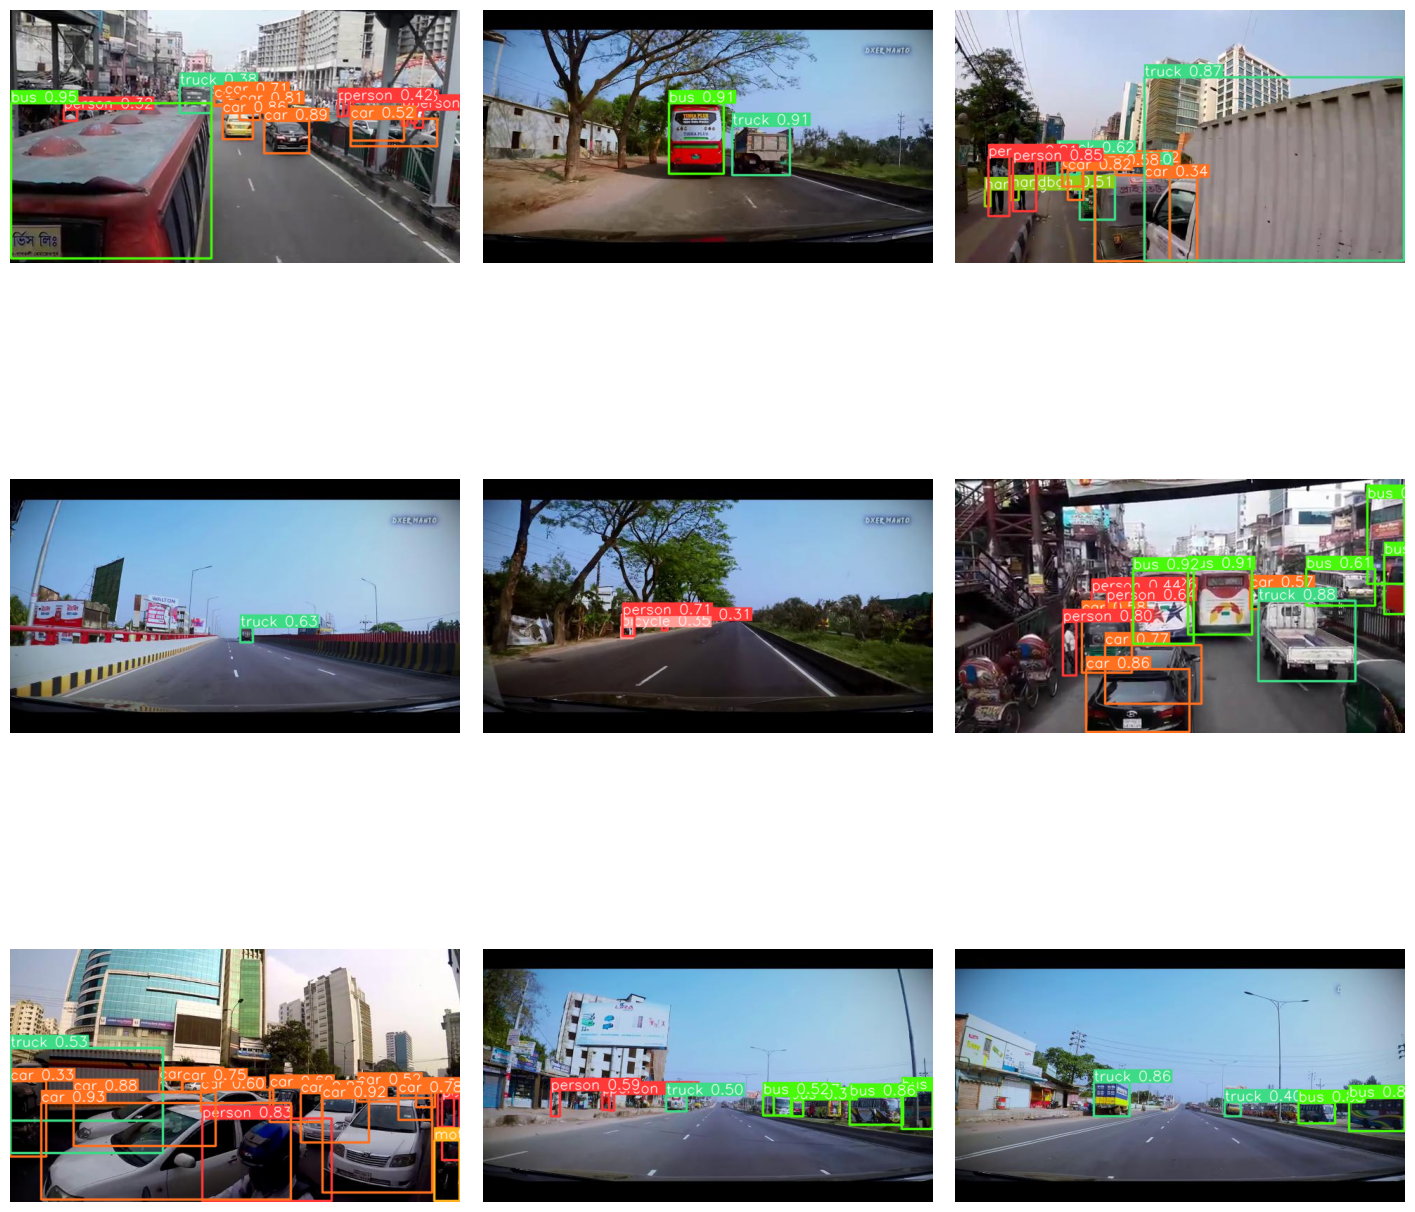

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
for i, img_file in enumerate(selected_images):
    row_idx = i // 3
    col_idx = i % 3
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)